In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Dataset/Iris/Iris.csv', delimiter=',', header=None)
train = df.sample(frac=0.8, random_state=200)
validation = df.drop(train.index)

iris = {}
iris['Iris-setosa'] = 1
iris['Iris-virginica'] = 2
iris['Iris-versicolor'] = 3

In [3]:
def stats(predicted, actual):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    total = 0

    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            tp += 1
        total += 1
    accuracy = float(tp)/total
    return accuracy

def euclidean(x, y):
    dist = 0.0
    for i in [0, 1, 2, 3]:
        dist += np.sqrt(math.pow(x[i]-y[i], 2))
    return dist

def manhattan(x, y):
    dist = 0.0
    for i in [0, 1, 2, 3]:
        dist += abs(x[i]-y[i])
    return dist

def minkowski(x, y):
    p = 1.5
    dist = 0.0
    for i in [0, 1, 2, 3]:
        dist += math.pow(abs(x[i]-y[i]), p)
    return math.pow(dist, (1.0)/p)

def cosine(x, y):
    xi = 0.0
    yi = 0.0
    for i in [0, 1, 2, 3]:
        xi += math.pow(x[i], 2)
        yi += math.pow(y[i], 2)
    dist = 0.0
    for i in [0, 1, 2, 3]:
        dist += (x[i]*y[i])
    return 1-((dist)/(np.sqrt(xi)*np.sqrt(yi)))
    
def knn(m, k, train, validation):
    predicted = []
    
    actual = []
    
    for vindex, vrow in validation.iterrows():
        res = []
        
        for tindex, trow in train.iterrows():
            dist = 0.0
            if m == 'euclidean':
                dist = euclidean(vrow, trow)
            if m == 'manhattan':
                dist = manhattan(vrow, trow)
            if m == 'minkowski':
                dist = minkowski(vrow, trow)
            if m == 'cosine':
                dist = cosine(vrow, trow)
            res.append([dist, iris[trow[4]]])
        
        temp = []
    
        res = sorted(res)
        
        i = 0
        
        while i < k:
            temp.append(res[i][1])
            i += 1
            
        predicted.append(np.argmax(np.bincount(temp)))
        actual.append(iris[vrow[4]])
        
    return stats(predicted, actual)            

Iris
	euclidean
		K:  1 	Accuracy:  0.925925925926
		K:  2 	Accuracy:  0.925925925926
		K:  3 	Accuracy:  0.962962962963
		K:  4 	Accuracy:  0.962962962963
		K:  5 	Accuracy:  0.925925925926
		K:  6 	Accuracy:  0.925925925926
		K:  7 	Accuracy:  0.925925925926
		K:  8 	Accuracy:  0.962962962963


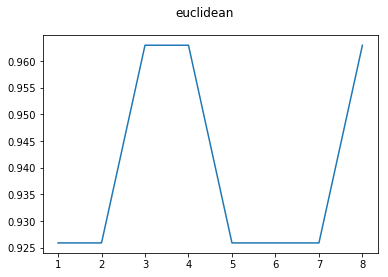

	manhattan
		K:  1 	Accuracy:  0.925925925926
		K:  2 	Accuracy:  0.925925925926
		K:  3 	Accuracy:  0.962962962963
		K:  4 	Accuracy:  0.962962962963
		K:  5 	Accuracy:  0.925925925926
		K:  6 	Accuracy:  0.925925925926
		K:  7 	Accuracy:  0.925925925926
		K:  8 	Accuracy:  0.962962962963


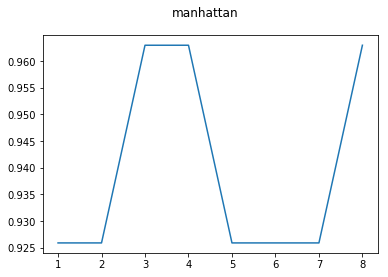

	minkowski
		K:  1 	Accuracy:  0.925925925926
		K:  2 	Accuracy:  0.925925925926
		K:  3 	Accuracy:  0.962962962963
		K:  4 	Accuracy:  0.962962962963
		K:  5 	Accuracy:  0.925925925926
		K:  6 	Accuracy:  0.925925925926
		K:  7 	Accuracy:  0.925925925926
		K:  8 	Accuracy:  0.962962962963


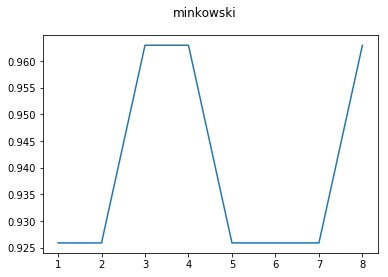

In [4]:
measure = ['euclidean', 'manhattan', 'minkowski']

print 'Iris'

for m in measure:
    x = []
    y = []
    print '\t', m
    for k in range(1, 9):
        a = knn(m , k, train, validation)
        print '\t\tK: ', k, '\tAccuracy: ', a
        y.append(a)
        x.append(k)
    plt.plot(x, y)
    plt.suptitle(m)
    plt.show()